In [1]:
import autograd.numpy as np
from autograd import grad
from autograd.numpy import log, sqrt, sin, cos, exp, pi, prod
from autograd.numpy.random import normal, uniform

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats
from tqdm import tqdm

In [3]:
from tools import Helper, Sampler
from domain import Flower, Polygon, Heart, Cross, Star

In [4]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
np.random.seed(9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


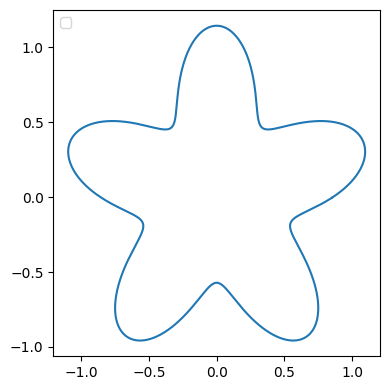

In [5]:
myHeart = Flower(petals=5, move_out=3)

points = myHeart.position(np.arange(0, 1, 0.001))
    
fig = plt.figure(figsize=(4, 4))
# plt.yticks([-4, -2, 0, 2, 4]) 
plt.plot(points[0, :], points[1, :])
plt.legend(loc="upper left", prop={'size': 10})
plt.tight_layout()
#plt.grid()
plt.show()

In [6]:
myHelper = Helper(Flower, grid_radius=1e-2, grid_curve=1e-3)

 17%|█████████████████████                                                                                                          | 49783/300001 [00:33<02:59, 1391.45it/s]

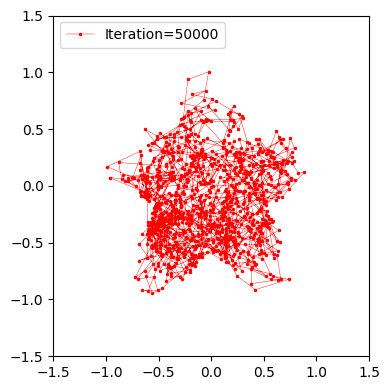

 33%|██████████████████████████████████████████▎                                                                                    | 99948/300001 [01:07<03:05, 1079.26it/s]

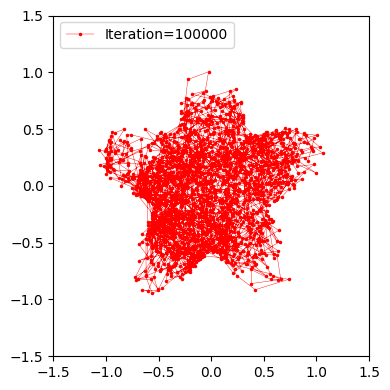

 50%|██████████████████████████████████████████████████████████████▉                                                               | 149874/300001 [01:40<02:13, 1128.08it/s]

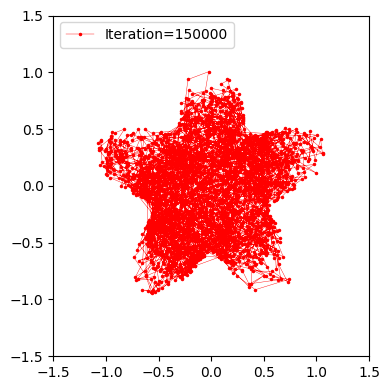

 67%|███████████████████████████████████████████████████████████████████████████████████▉                                          | 199850/300001 [02:12<01:01, 1622.57it/s]

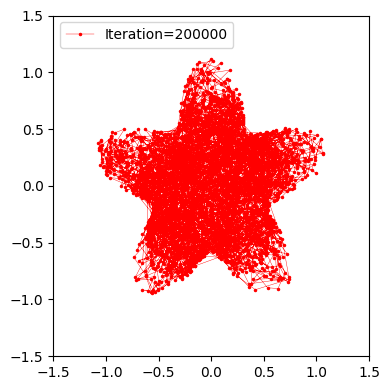

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 249940/300001 [02:45<00:51, 966.00it/s]

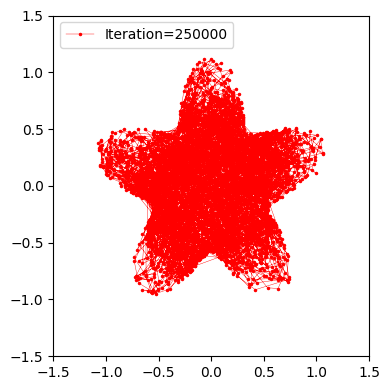

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 299994/300001 [03:21<00:00, 1245.82it/s]

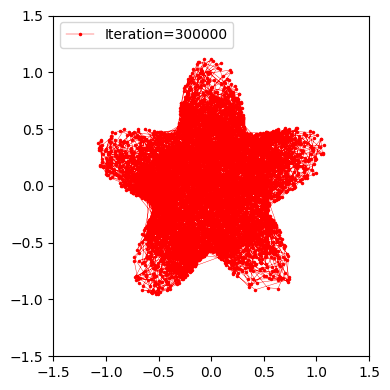

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300001/300001 [03:21<00:00, 1488.81it/s]


In [7]:
boundary_ = 1.5
sampler = Sampler(myHelper, boundary=boundary_, xinit=[0.,0.], lr=1e-4, T=2)
warm_up = 0
for iters in tqdm(range(int(3e5)+1)):
    sampler.rgld_step(iters)
    if iters > warm_up:
        if iters % 50000 == 0:
            fig = plt.figure(figsize=(4, 4))
            plt.plot(sampler.list[0, :], sampler.list[1, :], \
                     linewidth=0.3, marker='.', markersize=3, color='r', label="Iteration="+str(iters)) 
            plt.legend(loc="upper left", prop={'size': 10})
            plt.xlim([-boundary_, boundary_])
            plt.ylim([-boundary_, boundary_])
            plt.tight_layout()
            plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


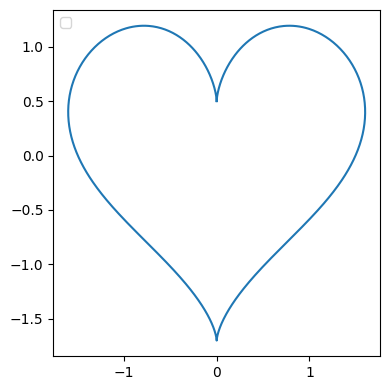

In [8]:
myHeart = Heart()

points = myHeart.position(np.arange(0, 1, 0.001))
    
fig = plt.figure(figsize=(4, 4))
# plt.yticks([-4, -2, 0, 2, 4]) 
plt.plot(points[0, :], points[1, :])
plt.legend(loc="upper left", prop={'size': 10})
plt.tight_layout()
#plt.grid()
plt.show()

In [9]:
myHelper = Helper(Heart, grid_radius=1e-2, grid_curve=1e-3)

  3%|████▎                                                                                                                           | 9987/300001 [00:05<02:25, 1991.07it/s]

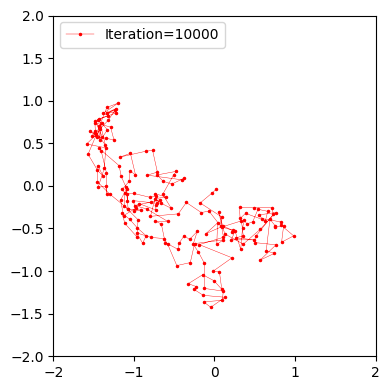

  7%|████████▍                                                                                                                      | 19903/300001 [00:11<02:33, 1821.12it/s]

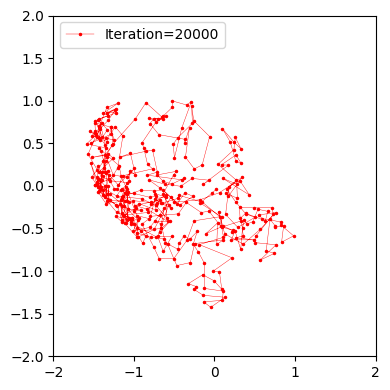

 10%|████████████▌                                                                                                                  | 29807/300001 [00:17<02:01, 2229.46it/s]

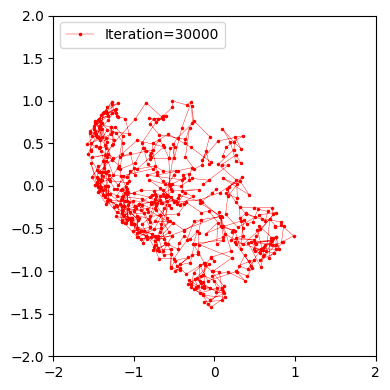

 13%|█████████████████                                                                                                               | 39916/300001 [00:23<04:22, 988.95it/s]

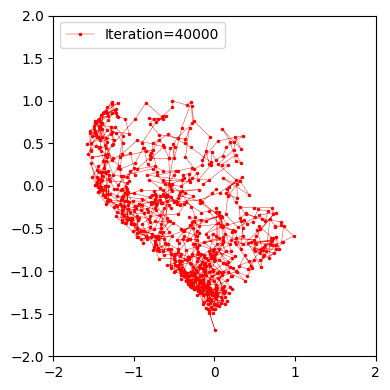

 17%|█████████████████████                                                                                                          | 49804/300001 [00:28<01:35, 2627.22it/s]

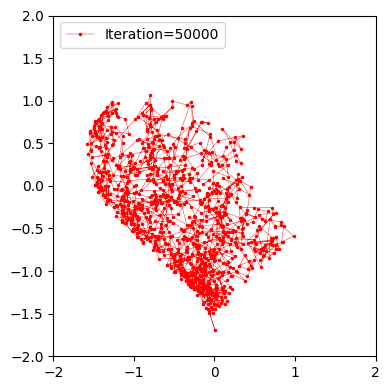

 20%|█████████████████████████▍                                                                                                     | 59963/300001 [00:33<01:31, 2617.44it/s]

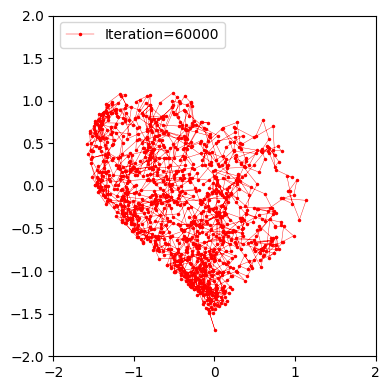

 23%|█████████████████████████████▌                                                                                                 | 69939/300001 [00:38<01:58, 1934.06it/s]

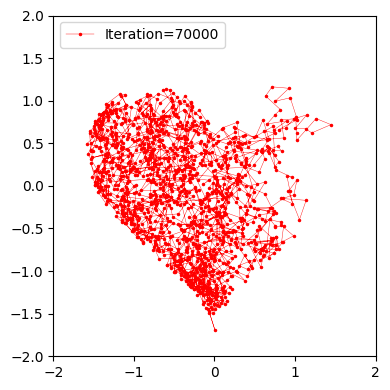

 27%|█████████████████████████████████▊                                                                                             | 79971/300001 [00:43<01:46, 2069.16it/s]

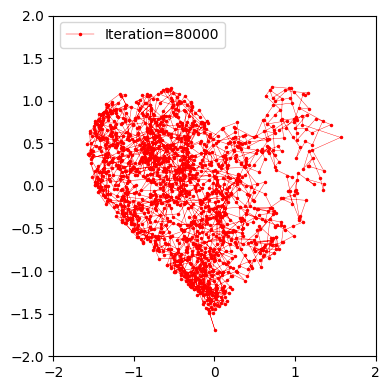

 30%|██████████████████████████████████████                                                                                         | 89805/300001 [00:49<02:05, 1681.55it/s]

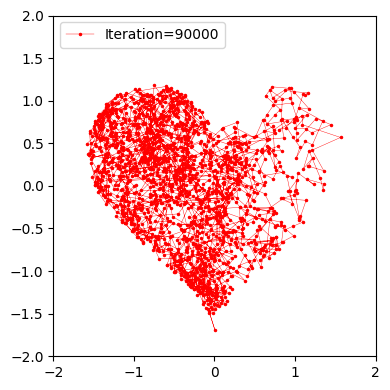

 33%|██████████████████████████████████████████▎                                                                                    | 99991/300001 [00:54<01:16, 2600.90it/s]

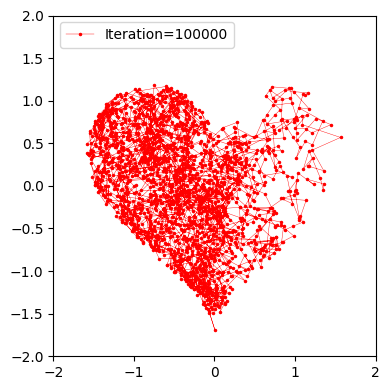

 37%|██████████████████████████████████████████████                                                                                | 109758/300001 [01:01<01:34, 2021.96it/s]

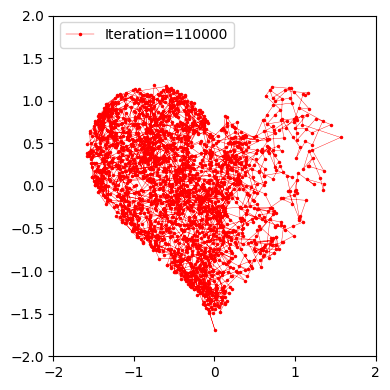

 40%|██████████████████████████████████████████████████▍                                                                           | 119953/300001 [01:06<01:22, 2176.09it/s]

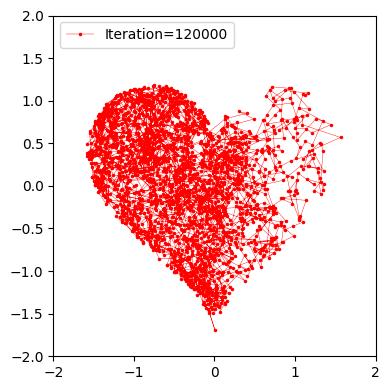

 43%|██████████████████████████████████████████████████████▉                                                                        | 129894/300001 [01:13<03:15, 868.73it/s]

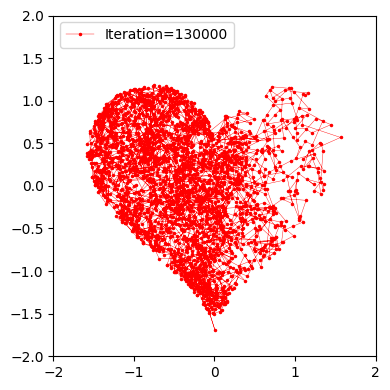

 47%|██████████████████████████████████████████████████████████▋                                                                   | 139867/300001 [01:18<01:04, 2472.30it/s]

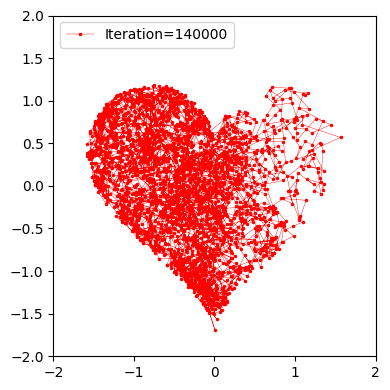

 50%|██████████████████████████████████████████████████████████████▉                                                               | 149774/300001 [01:23<00:59, 2509.82it/s]

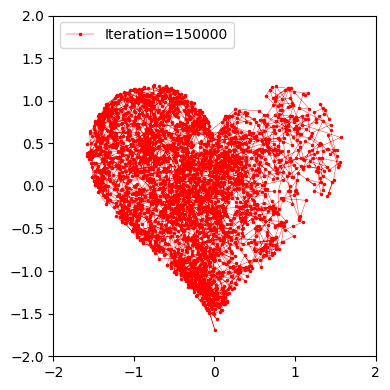

 53%|███████████████████████████████████████████████████████████████████▏                                                          | 159984/300001 [01:28<00:58, 2407.37it/s]

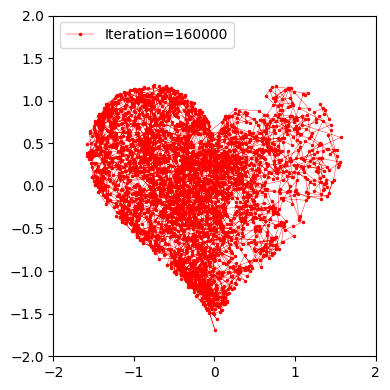

 57%|███████████████████████████████████████████████████████████████████████▎                                                      | 169845/300001 [01:34<01:08, 1898.71it/s]

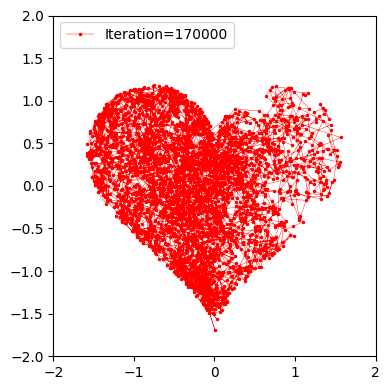

 60%|███████████████████████████████████████████████████████████████████████████▌                                                  | 179830/300001 [01:41<01:06, 1819.76it/s]

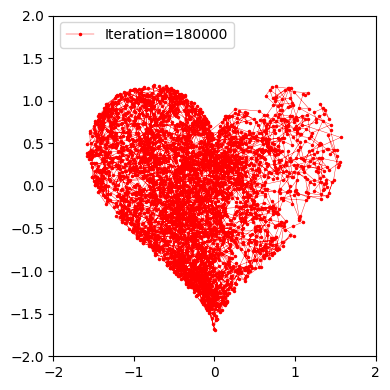

 63%|███████████████████████████████████████████████████████████████████████████████▋                                              | 189843/300001 [01:46<01:03, 1732.99it/s]

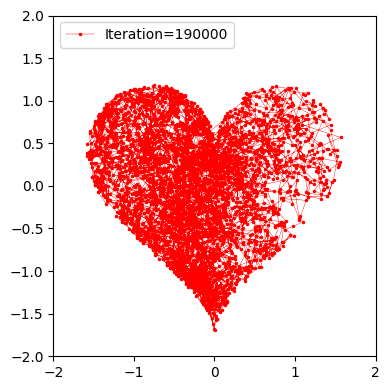

 67%|███████████████████████████████████████████████████████████████████████████████████▉                                          | 199900/300001 [01:52<00:59, 1680.94it/s]

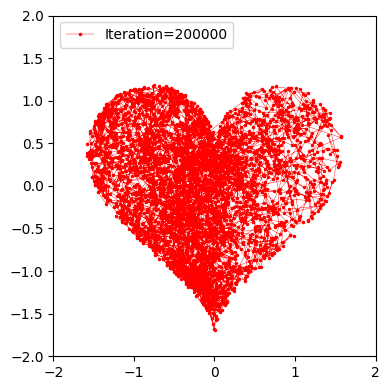

 70%|████████████████████████████████████████████████████████████████████████████████████████▏                                     | 209912/300001 [01:59<00:53, 1680.88it/s]

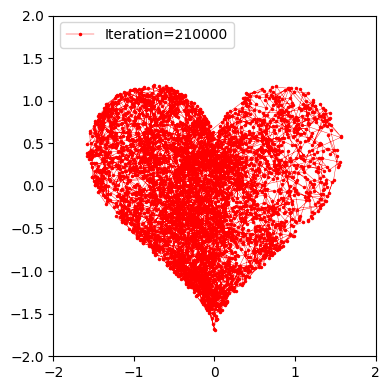

 73%|████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 219870/300001 [02:05<00:35, 2266.28it/s]

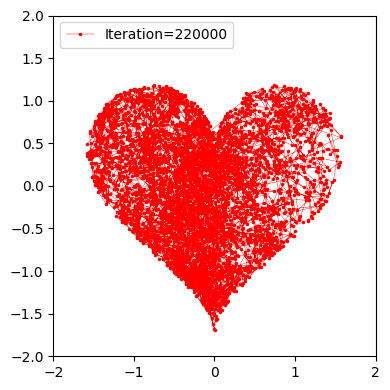

 77%|████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 229841/300001 [02:10<00:34, 2011.79it/s]

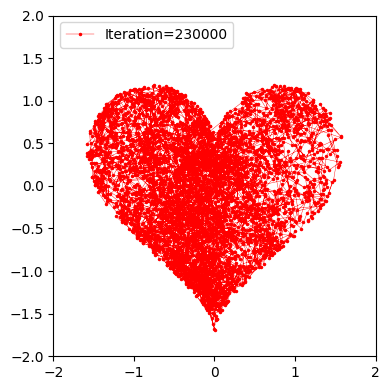

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 239908/300001 [02:16<00:27, 2177.29it/s]

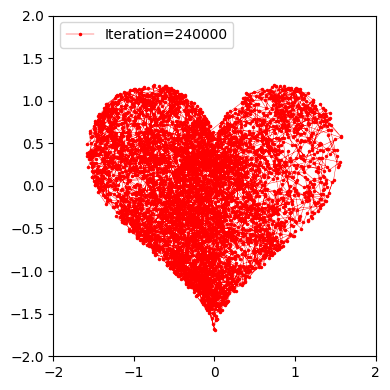

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 249837/300001 [02:22<00:28, 1784.34it/s]

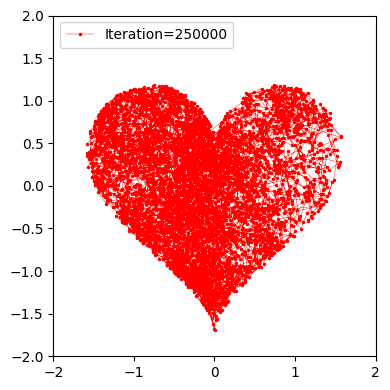

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 259820/300001 [02:29<00:29, 1343.76it/s]

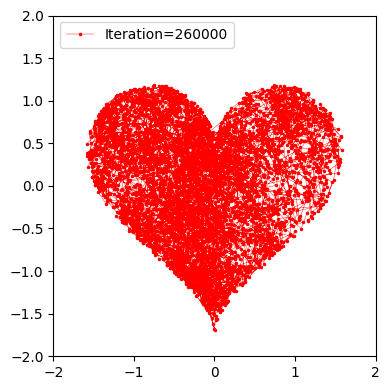

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 269778/300001 [02:34<00:14, 2138.05it/s]

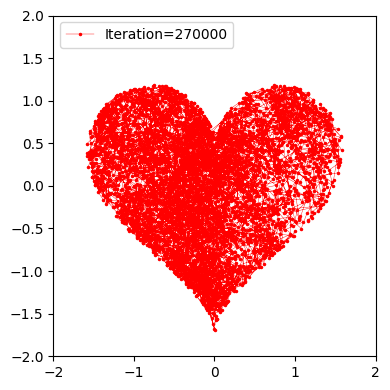

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 279731/300001 [02:38<00:10, 1971.98it/s]

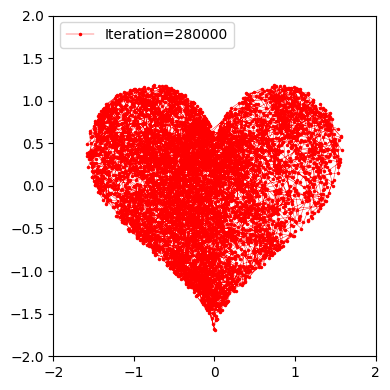

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 289924/300001 [02:43<00:04, 2173.95it/s]

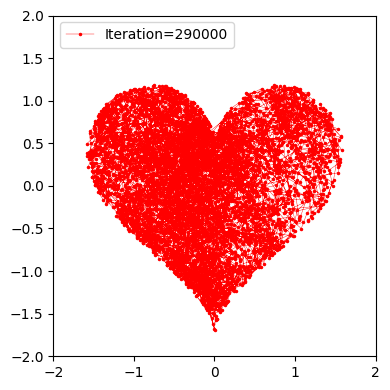

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 299809/300001 [02:48<00:00, 1645.46it/s]

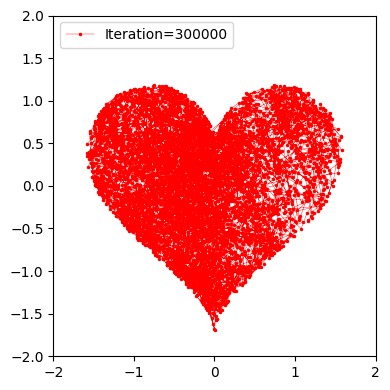

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300001/300001 [02:49<00:00, 1774.84it/s]


In [10]:
boundary_ = 2
sampler = Sampler(myHelper, boundary=boundary_, xinit=[0.,0.], lr=1e-4, T=2)
warm_up = 0
for iters in tqdm(range(int(3e5)+1)):
    sampler.rgld_step(iters)
    if iters > warm_up:
        if iters % 10000 == 0:
            fig = plt.figure(figsize=(4, 4))
            plt.plot(sampler.list[0, :], sampler.list[1, :], \
                     linewidth=0.3, marker='.', markersize=3, color='r', label="Iteration="+str(iters)) 
            plt.legend(loc="upper left", prop={'size': 10})
            plt.xlim([-boundary_, boundary_])
            plt.ylim([-boundary_, boundary_])
            plt.tight_layout()
            plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


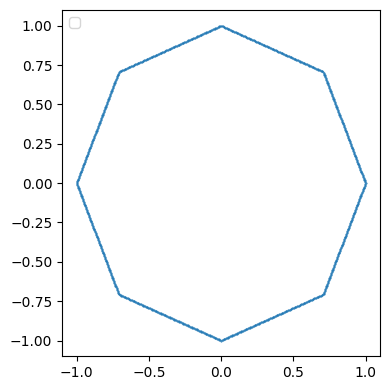

In [11]:
myPolygon = Polygon(corners=8)

points = myPolygon.position(np.arange(0, 1, 0.001))

fig = plt.figure(figsize=(4, 4))
plt.plot(points[0, :], points[1, :], 'o', markersize=0.5)
plt.legend(loc="upper left", prop={'size': 10})
plt.tight_layout()
plt.show()

In [12]:
myHelper = Helper(Polygon)

 50%|███████████████████████████████████████████████████████████████▎                                                               | 49850/100000 [00:38<00:41, 1194.67it/s]

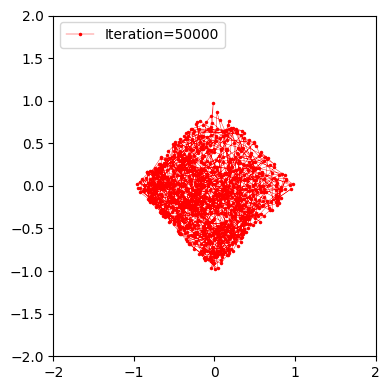

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [01:19<00:00, 1264.60it/s]


In [13]:
boundary_ = 2
sampler = Sampler(myHelper, boundary=boundary_, xinit=[0.,0.], lr=3e-4, T=2)
warm_up = 0
for iters in tqdm(range(int(1e5))):
    sampler.rgld_step(iters)
    if iters > warm_up:
        if iters % 50000 == 0:
            fig = plt.figure(figsize=(4, 4))
            plt.plot(sampler.list[0, :], sampler.list[1, :], \
                     linewidth=0.3, marker='.', markersize=3, color='r', label="Iteration="+str(iters)) 
            plt.legend(loc="upper left", prop={'size': 10})
            plt.xlim([-boundary_, boundary_])
            plt.ylim([-boundary_, boundary_])
            plt.tight_layout()
            plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


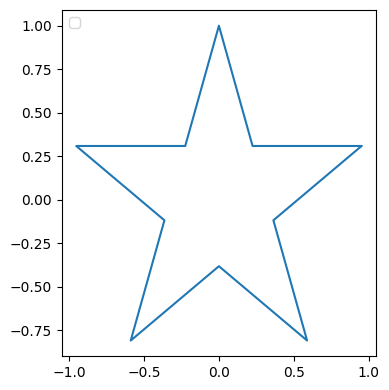

In [14]:
myClass = Star()

points = myClass.position(np.arange(0, 1, 0.001))

fig = plt.figure(figsize=(4, 4))
plt.plot(points[0, :], points[1, :])
plt.legend(loc="upper left", prop={'size': 10})
plt.tight_layout()
plt.show()

In [15]:
myHelper = Helper(Star, grid_radius=1e-2, grid_curve=1e-3)

 10%|████████████▋                                                                                                                   | 9878/100001 [00:07<00:41, 2160.86it/s]

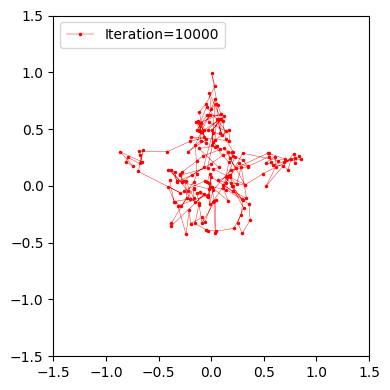

 20%|█████████████████████████▎                                                                                                     | 19891/100001 [00:17<01:02, 1275.03it/s]

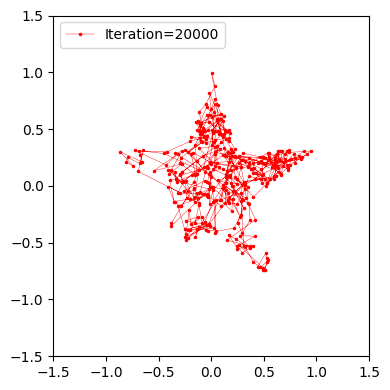

 30%|██████████████████████████████████████▎                                                                                         | 29941/100001 [00:27<02:18, 506.78it/s]

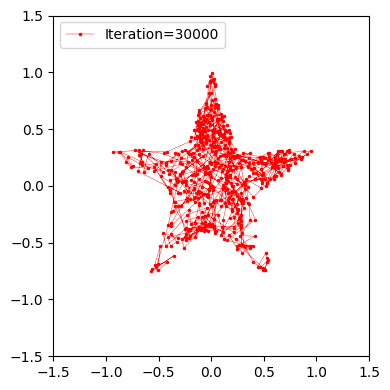

 40%|███████████████████████████████████████████████████                                                                             | 39925/100001 [00:37<01:10, 849.71it/s]

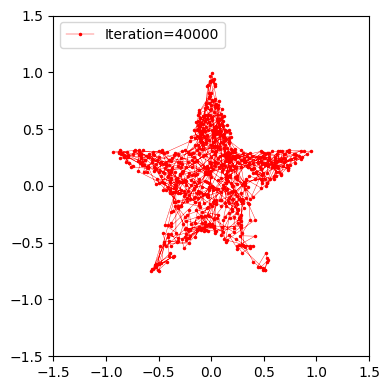

 50%|███████████████████████████████████████████████████████████████▎                                                               | 49870/100001 [00:46<00:47, 1060.09it/s]

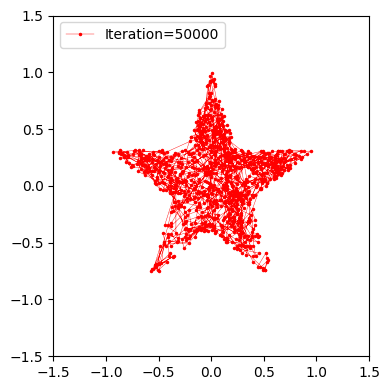

 60%|████████████████████████████████████████████████████████████████████████████▏                                                  | 59994/100001 [00:55<00:23, 1729.40it/s]

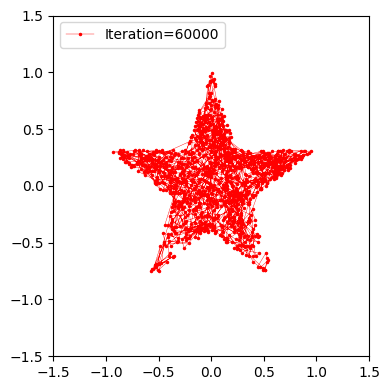

 70%|████████████████████████████████████████████████████████████████████████████████████████▊                                      | 69966/100001 [01:03<00:19, 1504.85it/s]

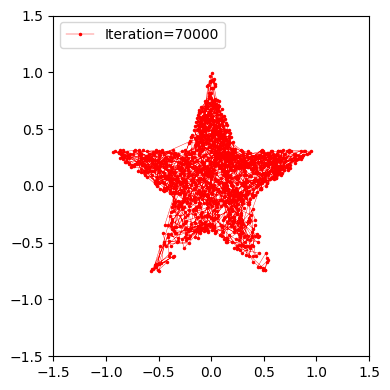

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 79832/100001 [01:11<00:20, 979.02it/s]

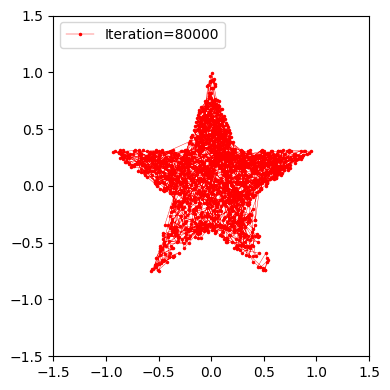

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 89938/100001 [01:19<00:18, 554.34it/s]

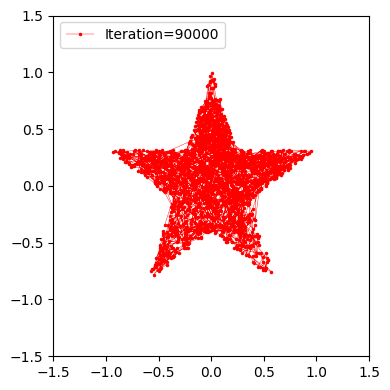

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 99961/100001 [01:29<00:00, 759.99it/s]

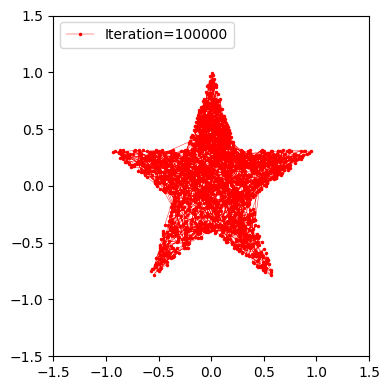

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100001/100001 [01:30<00:00, 1109.85it/s]


In [16]:
boundary_ = 1.5
sampler = Sampler(myHelper, boundary=boundary_, xinit=[0.,0.], lr=1e-4, T=2)
warm_up = 0
for iters in tqdm(range(int(1e5)+1)):
    sampler.rgld_step(iters)
    if iters > warm_up:
        if iters % 10000 == 0:
            fig = plt.figure(figsize=(4, 4))
            plt.plot(sampler.list[0, :], sampler.list[1, :], \
                     linewidth=0.3, marker='.', markersize=3, color='r', label="Iteration="+str(iters)) 
            plt.legend(loc="upper left", prop={'size': 10})
            plt.xlim([-boundary_, boundary_])
            plt.ylim([-boundary_, boundary_])
            plt.tight_layout()
            plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


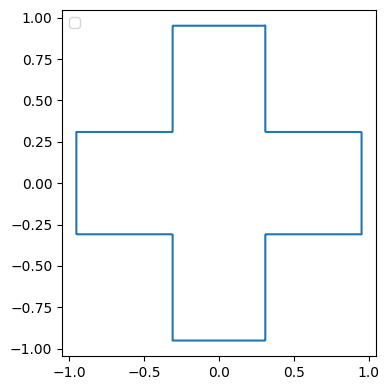

In [17]:
myClass = Cross()

points = myClass.position(np.arange(0, 1, 0.001))
    
fig = plt.figure(figsize=(4, 4))
plt.plot(points[0, :], points[1, :])
plt.legend(loc="upper left", prop={'size': 10})
plt.tight_layout()
plt.show()

In [18]:
myHelper = Helper(Cross, grid_radius=3e-3, grid_curve=3e-4)

 10%|████████████▉                                                                                                                    | 9987/100001 [01:34<09:16, 161.64it/s]

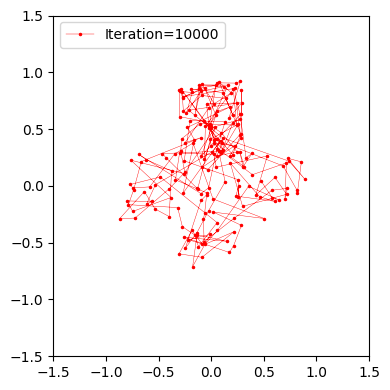

 20%|█████████████████████████▌                                                                                                      | 19979/100001 [03:19<06:56, 192.15it/s]

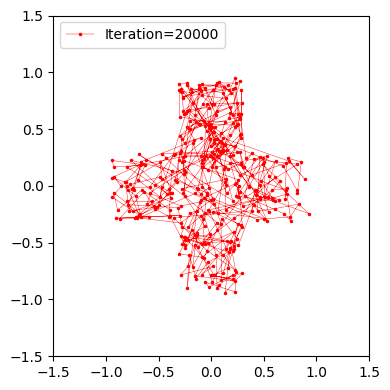

 30%|██████████████████████████████████████▍                                                                                         | 29989/100001 [04:54<05:56, 196.22it/s]

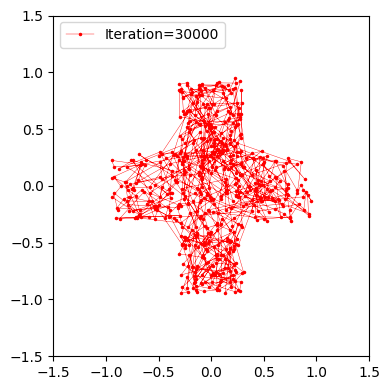

 40%|███████████████████████████████████████████████████▌                                                                             | 39992/100001 [06:39<15:44, 63.51it/s]

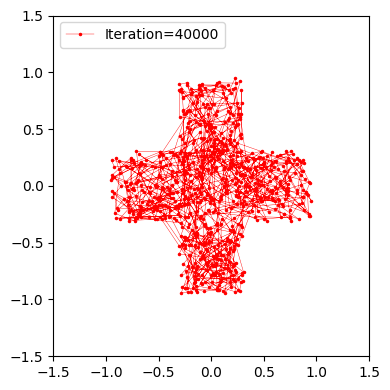

 50%|███████████████████████████████████████████████████████████████▉                                                                | 49996/100001 [08:34<05:49, 142.94it/s]

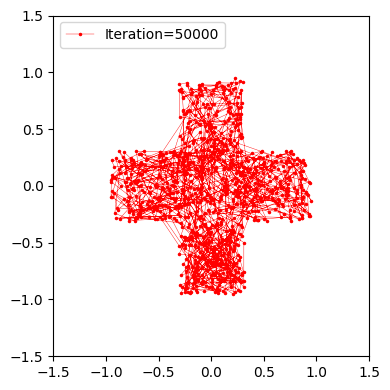

 60%|█████████████████████████████████████████████████████████████████████████████▍                                                   | 59991/100001 [10:27<12:54, 51.64it/s]

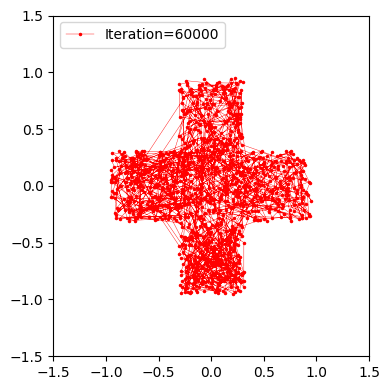

 70%|██████████████████████████████████████████████████████████████████████████████████████████▎                                      | 69999/100001 [12:22<06:04, 82.38it/s]

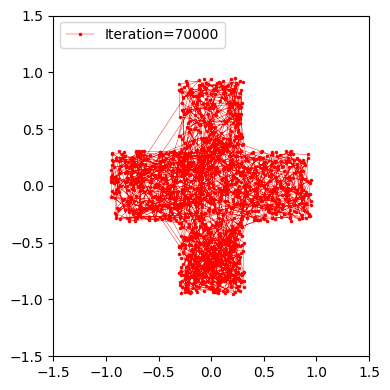

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 79996/100001 [14:11<01:40, 199.05it/s]

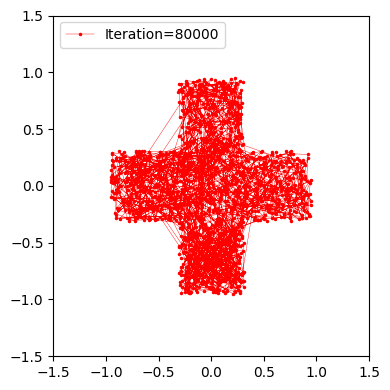

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 89989/100001 [15:54<00:53, 186.26it/s]

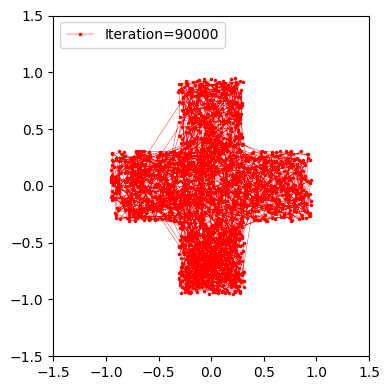

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 99983/100001 [17:39<00:00, 208.08it/s]

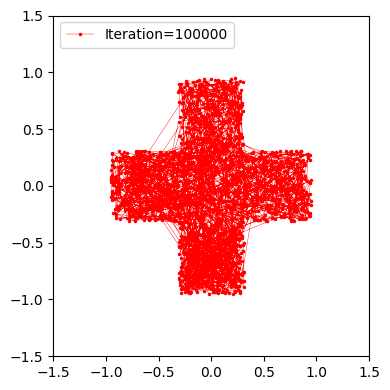

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100001/100001 [17:39<00:00, 94.37it/s]


In [19]:
boundary_ = 1.5
sampler = Sampler(myHelper, boundary=boundary_, xinit=[0.,0.], lr=3e-4, T=2)
warm_up = 0
for iters in tqdm(range(int(1e5)+1)):
    sampler.rgld_step(iters)
    if iters > warm_up:
        if iters % 10000 == 0:
            fig = plt.figure(figsize=(4, 4))
            plt.plot(sampler.list[0, :], sampler.list[1, :], \
                     linewidth=0.3, marker='.', markersize=3, color='r', label="Iteration="+str(iters)) 
            plt.legend(loc="upper left", prop={'size': 10})
            plt.xlim([-boundary_, boundary_])
            plt.ylim([-boundary_, boundary_])
            plt.tight_layout()
            plt.show()